In [1]:
import pandas as pd

In [2]:
app = pd.read_csv('/Users/hazel/Documents/credit_project_data/application_clear.csv',index_col=0)

In [3]:
# 計算空值站欄位的百分比
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [4]:
# 缺失值統計68個欄位有缺失值
pd.set_option("display.max_rows",1000)
pd.set_option("display.max_columns",1000)
missing_values = missing_values_table(app)
missing_values

Your selected dataframe has 210 columns.
There are 15 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_AVG,248360,69.7
NONLIVINGAPARTMENTS_AVG,246861,69.3
YEARS_BUILD_AVG,236306,66.3
OWN_CAR_AGE,235241,66.0
LANDAREA_AVG,210844,59.2
BASEMENTAREA_AVG,207584,58.3
NONLIVINGAREA_AVG,195766,55.0
EXT_SOURCE_1,193910,54.4
APARTMENTS_AVG,179948,50.5
ENTRANCES_AVG,178407,50.1


In [5]:
app.drop(['COMMONAREA_AVG','NONLIVINGAPARTMENTS_AVG','YEARS_BUILD_AVG','OWN_CAR_AGE','LANDAREA_AVG','BASEMENTAREA_AVG','NONLIVINGAREA_AVG','EXT_SOURCE_1','APARTMENTS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_AVG','TARGET','DAYS_EMPLOYED_ANOM'],axis=1,inplace=True)

In [6]:
app.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356255 entries, 0 to 356254
Data columns (total 196 columns):
 #    Column                                    Dtype  
---   ------                                    -----  
 0    SK_ID_CURR                                int64  
 1    CNT_CHILDREN                              int64  
 2    AMT_INCOME_TOTAL                          float64
 3    NAME_EDUCATION_TYPE                       int64  
 4    REGION_POPULATION_RELATIVE                float64
 5    DAYS_BIRTH                                int64  
 6    DAYS_EMPLOYED                             int64  
 7    DAYS_REGISTRATION                         float64
 8    DAYS_ID_PUBLISH                           int64  
 9    FLAG_MOBIL                                int64  
 10   FLAG_EMP_PHONE                            int64  
 11   FLAG_WORK_PHONE                           int64  
 12   FLAG_CONT_MOBILE                          int64  
 13   FLAG_PHONE                                

In [7]:
chao_label = pd.read_csv('/Users/hazel/Documents/credit_project_data/Jen-Chao Huang/processed_allHC_label.csv')
chao_label

,SK_ID_CURR,Loan_count,late_count_inLoan,INSTALMENT_count,late_count_total
0,100001,4.0,1.0,16.0,2.0
1,100002,2.0,0.0,38.0,0.0
2,100003,6.0,0.0,53.0,0.0
3,100004,2.0,0.0,7.0,0.0
4,100005,2.0,1.0,20.0,2.0
...,...,...,...,...,...
340360,448526,1.0,0.0,8.0,0.0
340361,449328,1.0,0.0,8.0,0.0
340362,451328,1.0,0.0,12.0,0.0
340363,451362,1.0,0.0,96.0,0.0


In [8]:
app = pd.merge(app,chao_label)
app

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT,AMT_GOODS_PRICE,AMT_ANNUITY,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_

In [9]:
app['late_count_inLoan'] = app['late_count_inLoan'].apply(lambda x:1 if x>0 else x)

In [10]:
app

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT,AMT_GOODS_PRICE,AMT_ANNUITY,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_

In [11]:
app.drop(['Loan_count','INSTALMENT_count','late_count_total'],axis=1,inplace=True)

In [13]:
app.isnull().sum()

SK_ID_CURR                                      0
CNT_CHILDREN                                    0
AMT_INCOME_TOTAL                                0
NAME_EDUCATION_TYPE                             0
REGION_POPULATION_RELATIVE                      0
DAYS_BIRTH                                      0
DAYS_EMPLOYED                                   0
DAYS_REGISTRATION                               0
DAYS_ID_PUBLISH                                 0
FLAG_MOBIL                                      0
FLAG_EMP_PHONE                                  0
FLAG_WORK_PHONE                                 0
FLAG_CONT_MOBILE                                0
FLAG_PHONE                                      0
FLAG_EMAIL                                      0
CNT_FAM_MEMBERS                                 0
REGION_RATING_CLIENT                            0
REGION_RATING_CLIENT_W_CITY                     0
HOUR_APPR_PROCESS_START                         0
REG_REGION_NOT_LIVE_REGION                      0


<AxesSubplot:>

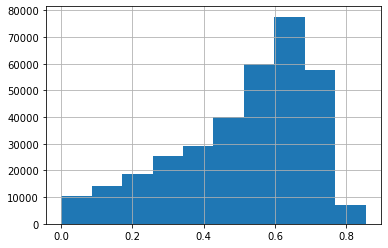

In [14]:
app['EXT_SOURCE_2'].hist()

<AxesSubplot:>

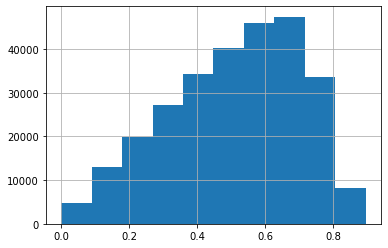

In [15]:
app['EXT_SOURCE_3'].hist()

In [16]:
app['EXT_SOURCE_2'] = app['EXT_SOURCE_2'].fillna(app['EXT_SOURCE_2'].median())
app['EXT_SOURCE_3'] = app['EXT_SOURCE_3'].fillna(app['EXT_SOURCE_3'].median())

In [17]:
app.isnull().sum()

SK_ID_CURR                                  0
CNT_CHILDREN                                0
AMT_INCOME_TOTAL                            0
NAME_EDUCATION_TYPE                         0
REGION_POPULATION_RELATIVE                  0
DAYS_BIRTH                                  0
DAYS_EMPLOYED                               0
DAYS_REGISTRATION                           0
DAYS_ID_PUBLISH                             0
FLAG_MOBIL                                  0
FLAG_EMP_PHONE                              0
FLAG_WORK_PHONE                             0
FLAG_CONT_MOBILE                            0
FLAG_PHONE                                  0
FLAG_EMAIL                                  0
CNT_FAM_MEMBERS                             0
REGION_RATING_CLIENT                        0
REGION_RATING_CLIENT_W_CITY                 0
HOUR_APPR_PROCESS_START                     0
REG_REGION_NOT_LIVE_REGION                  0
REG_REGION_NOT_WORK_REGION                  0
LIVE_REGION_NOT_WORK_REGION       

In [35]:
app.to_csv('/Users/hazel/Documents/credit_project_data/app.csv',index=False)

In [20]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
X = app.iloc[:,:-1]
y = app[['late_count_inLoan']]
# create pipeline
rfe = RFE(estimator=RandomForestClassifier(n_jobs=-1), n_features_to_select=11)
model = RandomForestClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
pipeline.fit(X,y)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=3, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
features_ref=X.columns[rfe.get_support()]
print(features_ref)

/Users/hazel/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_rfe.py:296: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/Users/hazel/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_rfe.py:296: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/Users/hazel/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_rfe.py:296: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/Users/hazel/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_rfe.py:296: DataConversi

Accuracy: 0.568 (0.063)
Index(['SK_ID_CURR', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT', 'AMT_ANNUITY'],
      dtype='object')


In [21]:
feature = app[['REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT', 'AMT_ANNUITY']]

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

X = feature
y = app[['late_count_inLoan']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

model = RandomForestClassifier(max_depth=10, n_estimators=10)
model.fit(X_train, y_train)

X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
num_correct_samples = accuracy_score(y_test, y_pred, normalize=False)
con_matrix = confusion_matrix(y_test, y_pred)
f1_score = f1_score(y_test, y_pred, average=None)
cross_val_score = cross_val_score(model,X,y,cv=10,scoring='accuracy')

print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))
print('con_matrix: {}'.format(con_matrix))
print('f1_score: {}'.format(f1_score))
print('cross_val_score: {}',cross_val_score)
print('cross_val_score_mean: {}',cross_val_score.mean())
print('訓練集{}'.format(model.score(X_train, y_train)))
print('測試集{}'.format(model.score(X_test,y_test)))

/var/folders/dp/hcv7h_qn59b6dcz6l8v_w1z80000gn/T/ipykernel_35191/135195978.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
/Users/hazel/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hazel/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hazel/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A colum

number of correct sample: 42069
accuracy: 0.6179983253272222
con_matrix: [[10426 18397]
 [ 7607 31643]]
f1_score: [0.44502305 0.70876918]
cross_val_score: {} [0.62017804 0.62446749 0.62376238 0.62103006 0.62772865 0.62480903
 0.62151839 0.62231167 0.61931484 0.61575978]
cross_val_score_mean: {} 0.622088032769383
訓練集0.639210847178764
測試集0.6179983253272222


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

X = feature
y = app[['late_count_inLoan']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
scaler = preprocessing.StandardScaler().fit(X_train)

# 建立 XGBClassifier 模型
model = XGBClassifier(n_estimators=100, learning_rate= 0.001, max_depth=10)
# 使用訓練資料訓練模型
model.fit(X_train, y_train)

# 使用訓練資料預測分類
X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
num_correct_samples = accuracy_score(y_test, y_pred, normalize=False)
con_matrix = confusion_matrix(y_test, y_pred)
f1_score = f1_score(y_test, y_pred, average=None)
cross_val_score = cross_val_score(model,X,y,cv=10,scoring='accuracy')

print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))
print('con_matrix: {}'.format(con_matrix))
print('f1_score: {}'.format(f1_score))
print('cross_val_score: {}',cross_val_score)
print('cross_val_score_mean: {}',cross_val_score.mean())
print('訓練集{}'.format(model.score(X_train, y_train)))
print('測試集{}'.format(model.score(X_test,y_test)))

number of correct sample: 71659
accuracy: 0.42107025966165834
con_matrix: [[71659     0]
 [98524     0]]
f1_score: [0.59261005 0.        ]
cross_val_score: {} [0.61873843 0.62014866 0.61947293 0.61600611 0.62323354 0.62284052
 0.61655306 0.61805147 0.61575978 0.61340933]
cross_val_score_mean: {} 0.6184213844174671
訓練集0.6475714235348039
測試集0.42107025966165834
